<a href="https://colab.research.google.com/github/MHoseinHoushmand/Clustering-documents-by-SFLA/blob/main/Clustering_by_SFLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries & prerequisites

In [ ]:
import numpy as np
import pdb
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from numpy.linalg import norm
from sklearn.decomposition import TruncatedSVD
from sklearn import metrics
import matplotlib.pyplot as plt
import operator
import random
import pandas as pd

In [ ]:
def docs_as_tfidf(docs):
  vectorizer = TfidfVectorizer(
  #   max_df=0.5, #Removing terms that are used in more than 50% of articles
  #   min_df=5,   #Removing terms that are not used in less than 10 of articles
     stop_words="english",
     #  max_features=1000,
  )
  docs_vector = vectorizer.fit_transform(docs)
  print(len(docs_vector.toarray()[0]))
  return docs_vector.toarray()

In [ ]:
def cosin_sim(a,b):
   return cosine_similarity([a], [b])[0][0]

# BBC text dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/bbc-text.csv")

In [ ]:
texts = list(df.text)[0:200]
labels_tag = list(df.category)[0:200]
labels = []
#print(labels_tag)
label_to_number = {'tech': 0, 'business': 1, 'sport': 2, 'entertainment': 3, 'politics': 4}
for label in labels_tag:
    labels.append(label_to_number[label])
print(labels)

[0, 1, 2, 2, 3, 4, 4, 2, 2, 3, 3, 1, 1, 4, 2, 1, 4, 2, 1, 0, 0, 0, 2, 2, 0, 2, 3, 0, 4, 3, 4, 0, 3, 3, 1, 4, 0, 3, 4, 1, 4, 2, 1, 2, 0, 3, 4, 4, 4, 1, 2, 4, 1, 1, 2, 4, 1, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 3, 0, 1, 4, 1, 4, 2, 1, 0, 1, 2, 2, 1, 1, 2, 4, 1, 3, 4, 4, 1, 3, 1, 2, 2, 4, 2, 4, 2, 1, 2, 1, 3, 3, 2, 1, 4, 4, 0, 2, 3, 2, 0, 1, 3, 2, 3, 2, 3, 3, 4, 2, 2, 3, 4, 1, 0, 1, 1, 0, 2, 4, 2, 0, 3, 2, 1, 1, 0, 3, 0, 2, 1, 1, 1, 0, 2, 0, 1, 2, 3, 2, 0, 2, 0, 4, 1, 0, 3, 2, 1, 4, 1, 3, 4, 4, 3, 4, 1, 3, 4, 4, 3, 4, 2, 1, 4, 4, 1, 3, 2, 1, 1, 2, 0, 2, 0, 0, 2, 1, 2, 4, 3, 4, 1, 4, 1, 0, 4, 3, 4, 0, 1]


9004
200 documents - 5 categories


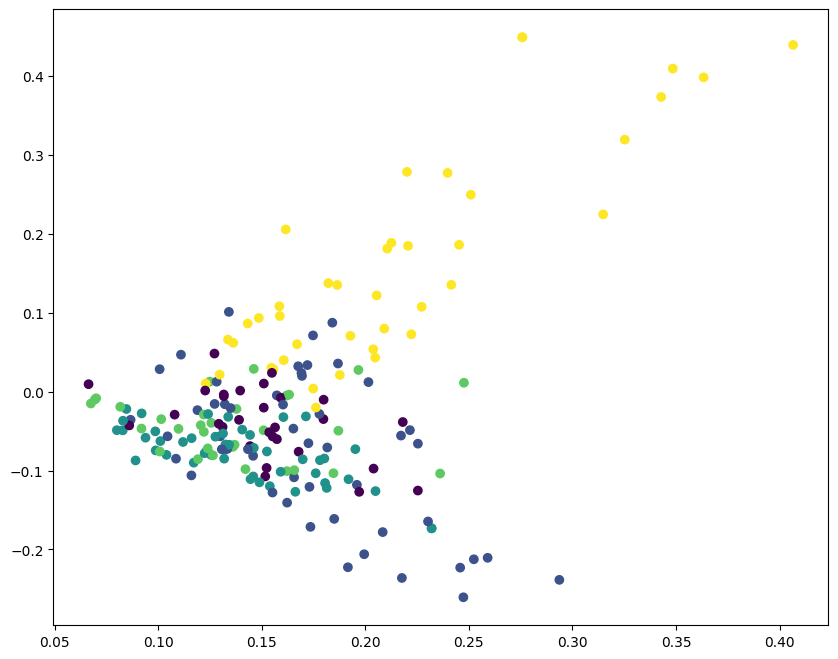

In [ ]:
lsa = TruncatedSVD(n_components=2)
docs_vector = docs_as_tfidf(texts)
lsa_matrix = lsa.fit_transform(docs_vector)
unique_labels, category_sizes = np.unique(labels, return_counts=True)
true_k = unique_labels.shape[0]
print(f"{len(texts)} documents - {true_k} categories")
tfidf_vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000, stop_words='english')
lsa = TruncatedSVD(n_components=2)
lsa_matrix = lsa.fit_transform(docs_vector)
plt.figure(figsize=(10, 8))
plt.scatter(lsa_matrix[:, 0], lsa_matrix[:, 1], c=list(labels), cmap='viridis')


# 20newsgroup dataset

In [ ]:
categories = [  #Select 4 categories from fetch_20newsgroups dataset
    "alt.atheism",
    "comp.graphics",
    "sci.space",
   # "rec.sport.hockey",
]
dataset = fetch_20newsgroups( #Preprocessing before using dataset
    remove=("headers", "footers", "quotes"),
    subset="all",
    categories=categories,
    shuffle=True,
    random_state=42,
)
texts = dataset.data[0:200]
labels = dataset.target[0:200]
unique_labels, category_sizes = np.unique(labels, return_counts=True)
true_k = unique_labels.shape[0]
print(f"{len(texts)} documents - {true_k} categories")

200 documents - 2 categories


4915
200 documents - 2 categories
4915


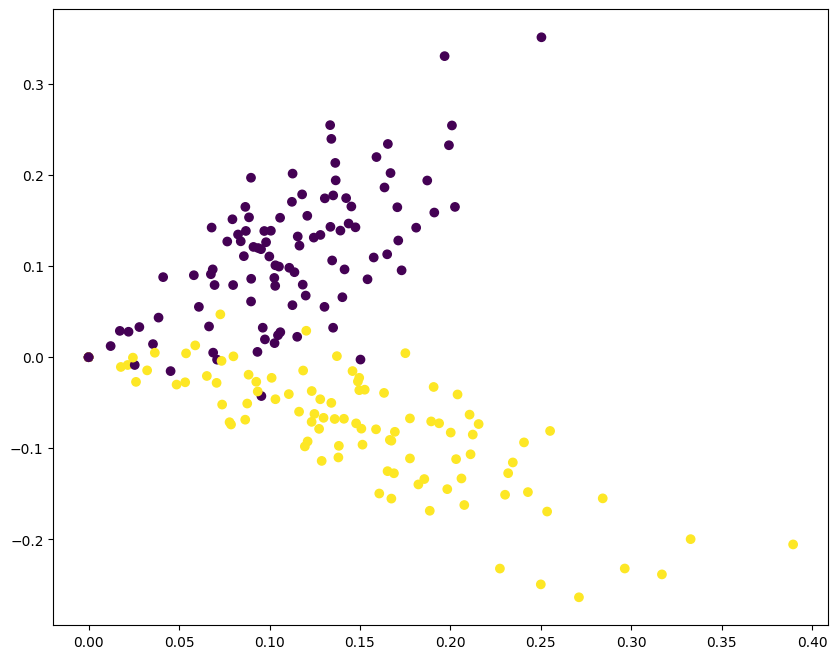

In [ ]:
lsa = TruncatedSVD(n_components=2)
docs_vector = docs_as_tfidf(texts)
lsa_matrix = lsa.fit_transform(docs_vector)
unique_labels, category_sizes = np.unique(labels, return_counts=True)
true_k = unique_labels.shape[0]
print(f"{len(texts)} documents - {true_k} categories")
tfidf_vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000, stop_words='english')
lsa = TruncatedSVD(n_components=2)
lsa_matrix = lsa.fit_transform(docs_vector)
plt.figure(figsize=(10, 8))
plt.scatter(lsa_matrix[:, 0], lsa_matrix[:, 1], c=list(labels), cmap='viridis')

# IMDB reveiw dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv")

In [ ]:
texts = list(df.review)[0:200]
labels_tag = list(df.sentiment)[0:200]
labels = []
#print(labels_tag)
label_to_number = {'negative': 0, 'positive': 1}
for label in labels_tag:
    labels.append(label_to_number[label])
print(labels)

[1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]


7261
200 documents - 2 categories
7261


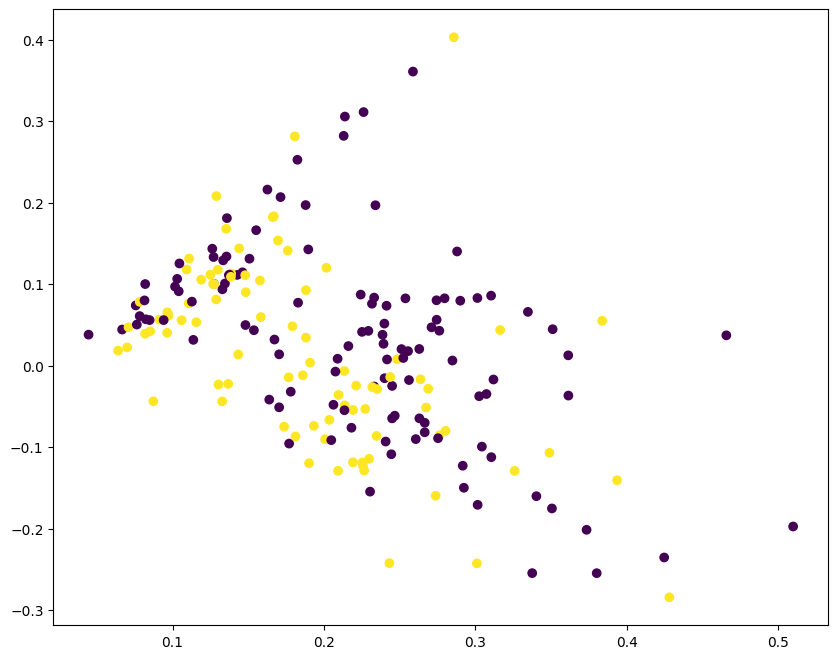

In [ ]:
lsa = TruncatedSVD(n_components=2)
docs_vector = docs_as_tfidf(texts)
lsa_matrix = lsa.fit_transform(docs_vector)
unique_labels, category_sizes = np.unique(labels, return_counts=True)
true_k = unique_labels.shape[0]
print(f"{len(texts)} documents - {true_k} categories")

tfidf_vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000, stop_words='english')
docs_vector = docs_as_tfidf(texts)
lsa = TruncatedSVD(n_components=2)
lsa_matrix = lsa.fit_transform(docs_vector)

plt.figure(figsize=(10, 8))
plt.scatter(lsa_matrix[:, 0], lsa_matrix[:, 1], c=list(labels), cmap='viridis')



# Define Objects

In [ ]:
class Cluster:
     def __init__(self):
         self.documents = []
         self.doc_mean = []

     def get_doc_mean(self):
        self.doc_mean = np.average(self.documents, axis=0)
        return self.doc_mean

     def SSE(self):     #Sum of squared error(SSE) as similarity of each documents with the cluster mean in document
         doc_mean = self.get_doc_mean()
         size = len(self.documents)
         sse=0
         for doc in self.documents:
             sse += cosin_sim(doc,doc_mean)**2
         try:
             sse = sse/size
         except ZeroDivisionError:
             return 0
         return sse


In [ ]:
class Frog:
     def __init__(self,answer,docs_vector,n_clusters):
        self.answer = answer
        self.value = self.fitness(docs_vector,n_clusters)



     def build_clusters(self,docs_vector,n_clusters):#Build clusters for frog
          clusters = []
          for i in range(n_clusters):
             cluster = Cluster()
             clusters.append(cluster)
          for j in range(len(self.answer)):
             if -1 < self.answer[j]:
                clusters[self.answer[j]].documents.append(docs_vector[j])
          return clusters


     def WC(self,clusters):   #Calculate similarity within clusters
        WC = 0
        for cluster in clusters:
            WC += cluster.SSE()
        return WC


     def BC(self,doc_means):#Calculate similarity between clusters
          BC=0
          size = len(doc_means)
          for i in range(size):
              for j in range(i+1,size):
                  BC += cosin_sim(doc_means[i],doc_means[j])**2
          return BC


     def fitness(self,docs_vector,n_clusters):
           doc_means = []
          # pdb.set_trace()
           clusters = self.build_clusters(docs_vector,n_clusters)
           for i in range(n_clusters):
               doc_means.append(
                  clusters[i].get_doc_mean()
               )
           wc = self.WC(clusters) #Calculate similarity within clusters
           bc = self.BC(doc_means) #Calculate similarity between clusters
           fitness = wc/bc
           return fitness


     def cross_over(self,frog_b,docs_vector,n_clusters): #perform 2 points cross over
           frog_size = len(self.answer)
           points = sorted(np.random.choice(np.arange(0,frog_size), size=2, replace=False))
           answer1 = self.answer[:points[0]] + frog_b.answer[points[0]:points[1]] + self.answer[points[1]:]
           answer2 = frog_b.answer[:points[0]] + self.answer[points[0]:points[1]] + frog_b.answer[points[1]:]
           child1 = Frog(answer1,docs_vector,n_clusters)
           child2 = Frog(answer2,docs_vector,n_clusters)
           if child1.value > child2.value: # return best child
               return child1
           else :
               return child2

     def mutation(self,docs_vector,n_clusters):#Select len(answer)/4 of answers and change value
         new_ans = list(self.answer)
         size = int(len(self.answer)/4)
         indexes = np.random.choice(np.arange(0,len(self.answer)), size=size, replace=False)#Select indexes for changing
         values= [random.randint(0, n_clusters-1) for _ in range(size)]
         for i in range(size):
            new_ans[indexes[i]] = values[i]
         child = Frog(tuple(new_ans),docs_vector,n_clusters)
         return  child

In [ ]:
class Memplex:
     def __init__(self):
         self.frogs = []

     def best(self):
        if len(self.frogs) > 0:
           return self.frogs[0]

     def worst(self,frogs):
        if len(self.frogs) > 0:
           return self.frogs[len(self.frogs)-1]

     def frogs_to_remove(self,sub_memplex):#Remove all frogs from submemplex in memplex
         for item in sub_memplex.frogs:
            self.frogs.remove(item)
         return self

     def add_frogs(self,submemplex):
         self.frogs = self.frogs + submemplex.frogs

In [ ]:
class Submemplex:
     def __init__(self, memplex ,n_submemplex,memplex_size ):#Creating submemplex by Trigonometric probability
         self.frogs = []
         self.prob_list = []
         indexs = []
         for i in range(memplex_size):
             for j in range(2*(memplex_size-i)):
                 self.prob_list.append(i)
         k=0
         while(k!=n_submemplex):
            index = random.choice(self.prob_list)
            key = memplex.frogs[index].answer
           # pdb.set_trace()
            if index not in indexs:
                self.frogs.append(memplex.frogs[index])
                indexs.append(index)
                k+=1

     def best(self):
         local_best =  max(self.frogs, key=lambda frog: frog.value)
         return local_best

     def worst(self):
         local_worst =  min(self.frogs, key=lambda frog: frog.value)
         return local_worst


In [ ]:
class Population:
     def __init__(self,n_clusters, n_population ,n_docs, docs_vector):
        answers = np.random.randint(0, n_clusters, size=(n_population , n_docs))
        self.frogs = []
        i=0
        for answer in answers:
           frog = Frog(tuple(answer),docs_vector,n_clusters)
           self.frogs.append(frog)
           print(i,frog.value)
           i+=1

     def clear_frogs(self):
        self.frogs.clear()

     def global_best(self,memplexes):#Return best frog of all memplexes
        local_bests = []
        for memplex in memplexes:
            local_best =  max(memplex.frogs, key=lambda frog: frog.value)
            local_bests.append(local_best)
        global_best =  max(local_bests, key=lambda frog: frog.value)
        return global_best

     def shufeling(self,memplexes):#Shufle memplexes and recreate population
         output = []
         for memplex in memplexes:
            output = output+ memplex.frogs
         self.frogs = output

In [ ]:
class SFLA:
     def  __init__(self,n_clusters, max_iteration, texts ,labels):
        self.n_clusters = n_clusters
        self.max_iteration =  max_iteration
        self.docs = texts
        self.n_population = 400 # Frogs number
        self.memplex_size = 20 #define as m
        self.n_memplex = 20 #define as n
        self.local_iteration = 10 #Iteration As local search
        self.n_submemplex = 5
        self.docs_vector = docs_as_tfidf(self.docs)  #Convert documents as tfidf values
        self.n_docs = len(self.docs)
        self.labels = labels


     def create_memplexes(self,population,n_memplex):#ّFrogs are distributed fairly in the memplexes
             population = sorted(population.frogs, key=lambda frog: frog.value)
             memplexes = []
             for i in range(n_memplex):
                 memplex = Memplex()
                 memplexes.append(memplex)
             for i in range(self.n_population):
                 memplexes[i % n_memplex].frogs.append(population[i])
             return memplexes

     def plot_frog(self, frog):
        lsa = TruncatedSVD(n_components=2)
        lsa_matrix = lsa.fit_transform(self.docs_vector)
        labels = frog.answer
        unique_labels, category_sizes = np.unique(labels, return_counts=True)
        true_k = unique_labels.shape[0]
        lsa = TruncatedSVD(n_components=2)
        plt.figure(figsize=(10, 8))
        plt.scatter(lsa_matrix[:, 0], lsa_matrix[:, 1], c=list(labels), cmap='viridis')

     def evaluation(self ,frog) :
          homogeneity_score = metrics.homogeneity_score(self.labels, frog.value)
          completeness_score = metrics.completeness_score(self.labels, frog.value)
          v_measure_score = metrics.v_measure_score(self.labels, frog.value)
          accuracy_score = metrics.accuracy_score(self.labels, frog.value)
          print("homogeneity_score: " , homogeneity_score)
          print("completeness_score: ", completeness_score)
          print("v_measure_score: " , v_measure_score)
          print("accuracy_score: " , accuracy_score)



     def search(self):
        population = Population(self.n_clusters, self.n_population, self.n_docs, self.docs_vector)
        for i in range(self.max_iteration):
           memplexes = self.create_memplexes(population,self.n_memplex)
           population.clear_frogs()
           for j in range(self.n_memplex):
               submemplex = Submemplex(memplexes[j],self.n_submemplex,self.memplex_size)
               memplexes[j].frogs_to_remove(submemplex)
               print(i,j,len(memplexes[j].frogs))
               for k in range(self.local_iteration):
                    lfrog_best = submemplex.best()
                    lfrog_worst = submemplex.worst()
                    frog_out = lfrog_worst.cross_over(lfrog_best, self.docs_vector, self.n_clusters)
                    if (lfrog_worst.value < frog_out.value ):
                         submemplex.frogs.remove(lfrog_worst)
                         submemplex.frogs.append(frog_out)
                    else:
                         gfrog_best = population.global_best(memplexes)
                         frog_out = gfrog_best.cross_over(lfrog_worst, self.docs_vector, self.n_clusters)
                         if (lfrog_worst.value<frog_out.value):
                                      submemplex.frogs.remove(lfrog_worst)
                                      submemplex.frogs.append(frog_out)
                         else:
                                      frog_out = gfrog_best.mutation(self.docs_vector,self.n_clusters)
                                      submemplex.frogs.remove(lfrog_worst)
                                      submemplex.frogs.append(frog_out)
               memplexes[j].add_frogs(submemplex)
           gfrog_best = population.global_best(memplexes)
           print(gfrog_best.answer)
           print(gfrog_best.value)
           population.shufeling(memplexes)
        return gfrog_best

# Test code

In [ ]:
sfla = SFLA(2,50,texts,labels)
best_frog = sfla.search()

7261
0 0.16651756153590805
1 0.1666107724995561
2 0.16510185414019196
3 0.1683585842011484
4 0.1676227827497879
5 0.1667334244454963
6 0.1651220725792587
7 0.1720896986816838
8 0.16323511238783714
9 0.16264265255238525
10 0.16005635175971236
11 0.16542626915269787
12 0.16295764271152038
13 0.16405887634924116
14 0.16482833073524025
15 0.1649297962385815
16 0.16827461286150758
17 0.1687638631120071
18 0.16127957126153947
19 0.16472377115060802
20 0.16396536243661047
21 0.16681736045255965
22 0.16408455847015332
23 0.16299992006895742
24 0.16342790117028186
25 0.16254842168666606
26 0.16203553208649601
27 0.1661239684269884
28 0.16285328750738315
29 0.16308825801927926
30 0.16438064996317042
31 0.16940710390459077
32 0.1598256233345422
33 0.1645374636704705
34 0.16055750789206927
35 0.1705198704239688
36 0.16360973634476458
37 0.1609071183779509
38 0.16256297202023276
39 0.16492436315803008
40 0.16536544365530428
41 0.16894929853608354
42 0.16511739339490913
43 0.162396615890102
44 0.162

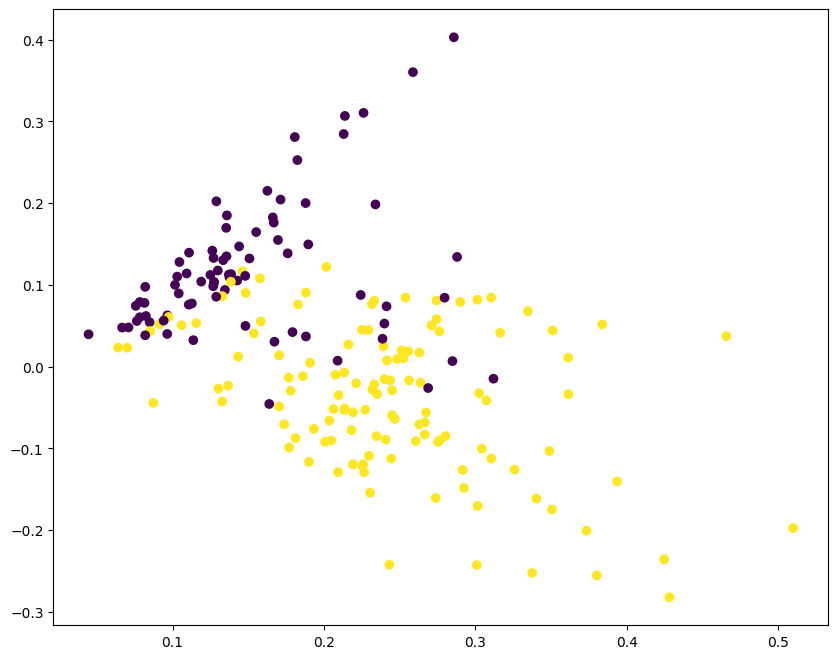

In [ ]:
sfla.plot_frog(best_frog)